# Training a Random Forest Classifier

You want to train a classification model using a forest of randomized decision trees.


In [1]:
# Load libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

In [2]:
# Load data

iris = datasets.load_iris()

# Create feature matrix and target vector

features = iris.data
target = iris.target

In [3]:
# Create random forest classifier object

randomforest = RandomForestClassifier(random_state = 0, n_jobs = 1)

In [4]:
# Train a model

model = randomforest.fit(features,target)

In [5]:
# Make new observation

observation = [[5,4,3,2]]

In [6]:
# Predict observation's class

model.predict(observation)

array([1])

A common Problem with decision trees is that they tend to fit the training data too closely (i.e., overfitting) 

Change measuse of dplit quality used.

In [7]:
# Create random forest classidier object using entropy

randomforest_entropy = RandomForestClassifier(criterion="entropy", random_state = 0)

In [8]:
# Train model 

model_entropy = randomforest_entropy.fit(features, target)
model_entropy.predict(observation)

array([1])

Max_features: By default is set to auto ( = sqrt(p)). Where p are the total number of features. 

It determines the maximun features to be considered at each node and takes a number of arguments including integers, floats and sqrt

Bootstrap : Allows us to set whether the subset of observations considered for a tree is created using sampling with replacement. default = True

n_estimators : numbers of trees to construct. default = 10


# Trainig Random Forest Regressor

You want to train a regression model using "forest" of randomized decision trees.

Each tree will use a bootstrapped subset of observations and at each node the decision rule considers only a subset of features.

In [9]:
# Load libraries

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston

In [10]:
# Load data

boston = load_boston()

# Create features matrix and target vector

features = boston.data[:,0:2]
target = boston.target

In [11]:
# Create Random Forest Regressor

randomforest = RandomForestRegressor(random_state = 0, n_jobs = -1)

In [12]:
# Train model

model = randomforest.fit(features, target)

# Identifyinf Important Features in Random Forest

You need to know which features are most important in a random forest model.

One of the major benefits of decision trees is intrepretability. Specifically we can visualize the entire model. 

We can compare and visualize the relative importance of each feature.

### Feature Importance

Scikit learn requires that we break up nominal categorical features into multiple binary features. This has the effect of spreading the importance of that feature across all of the binary features and can often make each feature appear to be unimportant

If two features are highly correlated one feature will claim much of the importance, making the other feature appear to be far less important.

In [13]:
# Load Libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

In [14]:
# Load data

iris = load_iris()

# Create feature matrix and target vector

features = iris.data
target = iris.target

In [15]:
# Create random forest classifier object

randomforest = RandomForestClassifier(random_state = 0, n_jobs = -1)

In [16]:
# Train model

model = randomforest.fit(features,target)

Scikit learn, classification and regression decision trees and random forest can report the relative importance of each feature.
The higher the number the higher the importance.

In [17]:
# Importante of features calculated

importances = model.feature_importances_
importances

array([0.09090795, 0.02453104, 0.46044474, 0.42411627])

In [18]:
# Sort feature importances in descending order

indices = np.argsort(importances)[::-1]
indices

array([2, 3, 0, 1])

In [19]:
### Rearrange feature names so they match the sorted featur importances

names = [iris.feature_names[i] for i in indices]
names

['petal length (cm)',
 'petal width (cm)',
 'sepal length (cm)',
 'sepal width (cm)']

([<matplotlib.axis.XTick at 0x7f70289495f8>,
 <a list of 4 Text xticklabel objects>)

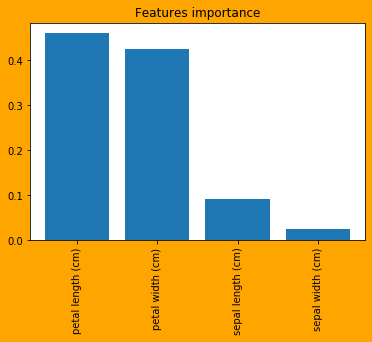

In [42]:
# Create Plot

plt.figure(facecolor = "orange")

# Create Plot Title

plt.title("Features importance")

# Add bars

plt.bar(range(features.shape[1]), importances[indices])

# Add feature names as x-acis labels

plt.xticks(range(features.shape[1]), names, rotation = 90)

## Select Important Features in Random Forest

Conduct feature selection on a random forest.

Identify the importance features and retrain the model using only the most important features.

There are situations where we might want to reduce the number of features , for instance : 

To reduce the model's variance

Improve interpretability of the model by considering only the most important features.

We can create a simple two-stage workflow to create a model with reduced features.

First we train a random forest model using all features. 

Then we use this model to identify the most important features. 

Next we create a feature matrix that includes only these features. 

The we use SelectFromModel method to create a feature matrix containing only features with an importance greater than or equal to a threshold value (0.3) .

Finally we create a model containing only those values.



### Caveats 

In this approach there are two main things to take into consideration:

- Nominal categorical features that have been one hot encoded will see the feature importance siluted across the binary features.
- The feature importance of highly correlated features will be effectively assigned to one feature and not evenly distributed across both features.

In [ ]:
# Load libraries

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [ ]:
# Load data

iris = load_iris()
features = iris.data
target = iris.target


In [ ]:
# Create a RandomForestClassifier

randomforest = RandomForestClassifier (random_state = 0, n_jobs = -1)

In [ ]:
# Create object that selects features with importance greater than or equal to a threshold


selector = SelectFromModel(randomforest, threshold = 0.3)

In [ ]:
# New feature matrix using selector

features_important = selector.fit_transform(features,target)

In [ ]:
# Train Random Forest Using most Important Features

model = randomforest.fit(features_important,target) 

# Handling Imbalanced Classes

You have a target vector with highly imbalanced classes and want to train a random forest model.

## Imbalanced clasess

Very common in real world, can reduce the performance of our model. 

RandomForestClassifier(class_weight = {"male" = 0.2 , "female" = 0.8} will weight the classes accordingly

class_weight = "balanced" ==> Useful argument whereinn classes are automatically weighted inversely proportinal to how frequently thy appear on the data

 Wj = N / Knj 
 
 k = Number of clases = 2
 n = observations == 110
 10 /100 observations of each class 
 
 


In [ ]:
# Calculate weight 

print("Calculate weight for small class ==> 110 / (2*10) = ", 110 / (2*10))
print("Calculate weight for large class ==> 110 / (2*100) = "  , 110 / (2*100))

In [21]:
# Import Libraries

import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

In [22]:
# Load data

iris = datasets.load_iris()
features = iris.data
target = iris.target

In [23]:
# Make class highly imbalanced by removing first 40 observations

features = features[40:,:]
target = target[40:]
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [24]:
# Create target vector indicating if class 0 otherwise 1

target = np.where((target == 0), 0 , 1)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [25]:
# Create random forest classifier object

randomforest = RandomForestClassifier(random_state = 0, n_jobs = -1, class_weight = "balanced")

In [26]:
# Train a model

model = randomforest.fit(features, target)

# Controlling Tree Size 

You want to manually determine the structure and sizr of a decision tree.

max_depth == deep of tree.If None the tree is grown until all leaves are pure. If an integer, 3 id effectively "pruned" to that depth

min_samples_split == Minimum number of observations at a node before that node is split. if integet, raw minimum. if float is the percent of observations

min_samples_leaf == minimum number of observations required to be at a leaf. (same arguments than min_samples_split)

max_leaf_nodes == maximum number of leaves

min_impurity_decrease == Minimum impurity decrease required before a splot is performed

In [27]:
# Load libraries 

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [28]:
# Load data

iris = load_iris()
features = iris.data
target = iris.target

In [29]:
# Create decision tree classifier objet

decisiontree = DecisionTreeClassifier(random_state = 0,
                                      max_depth = None,
                                      min_samples_split = 2,
                                      min_samples_leaf = 1,
                                      min_weight_fraction_leaf = 0,
                                      max_leaf_nodes = None,
                                      min_impurity_decrease = 0)
                                    

In [30]:
# Train model

model = decisiontree.fit(features, target)

# Improving Performance through boosting

You need a model with better performance than decision trees or random forests.

## Adaboost

Approach boosting form. Train a series of weak models (shallow decision tree, stump) , each interaction giving higher priority to observaitons the previous model predicted incorrectly.

Assigns every observation an initial weight value. w = 1 / n . n is the total number of observations in the data.

Train a weak model on the data

For each observation : 

- if weak model predicts correctly w is increased
- if weak model predicts incorrectly w is decreased

Train a new weak model where observations with greater w are given greater priority

Repeat steps un til data is perfectly predicted or a preset number of weak models has been trained.

The end result is an aggregated model where individuals weak models focus on more difficult observations. Parameters : 

- base_estimator : learning algorithm to train weak models. decision tree by default
- n_estimators : number of models to iteratively train
- learning_rate : contribution of each model to the weights. 1 by default. 
- loss : exclusive from AdaBoostRegressor, set the loss function to use when updating weights. linear function by default, could be exponential or square.


In [31]:
# Load libraries 

from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

In [32]:
# Load data

iris = load_iris()
features = iris.data
target = iris.target

In [33]:
# Create adaboost Classifier

adaboost = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=0)
adaboost

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=0)

In [34]:
model = adaboost.fit(features, target)

# Evaluating Random Forest With Out of Bags Errors

Validating Random FOrest wthout using cross-validation.


## Out of Bags Errors

In random forest each decision tree is trained using a bootstrapped subset of observations. This means that for every tree there is a separate subset of observations not being used to train that tree, these are called OOB, out of bags observations. 

We can use OOB observations as a test set ti evaluate the performance of our model.

For wvery observation the algorithm compares the observation's true values with the prediction from a subset of trees not trained using that observations. The overall score is calculated and provides asingle measure of a random forest performance. 

Excellent alternative to Cross Validation

In [35]:
# Load libraries

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

In [36]:
# Load data

iris = load_iris()
features = iris.data
target = iris.target

In [37]:
# Create random forest classifier

randomforest = RandomForestClassifier(random_state = 0, n_estimators = 1000, oob_score = True, n_jobs = -1)

In [38]:
# Train model 

model = randomforest.fit(features,target)

In [39]:
# View out of bag error

randomforest.oob_score_

0.9533333333333334